In [19]:
import numpy as np
import pandas as pd
import py7zr
import os
import xml.etree.ElementTree as ET 
import csv
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
stop =stopwords.words('english')

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yizhizhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Extract files from 7z zipfile

In [8]:
archive = py7zr.SevenZipFile('academia.stackexchange.com.7z', mode='r')
archive.extractall(path="/Volumes/GoogleDrive/My Drive/Fordham/ds/dataset for learning/stackexchange")
archive.close()

## Convert XML files into CSV files and save in the same directory

In [ ]:
# Make csv files from the xml files.
def make_csv(folderpath, xmlfilename):
    filename, _ = xmlfilename.rsplit('.', 1) # get the file name of the xml file.
    csvfilename = os.path.join(folderpath,filename+'.csv') # file name with path
    
    tree = ET.parse(os.path.join(folderpath, xmlfilename)) # parse xml files to element tree.
    # Get the unique keys of the xml file as column names of its csv file.
    def get_header(elementTree):
        """
        Purpose:
        Get the header of the first element tree, 
        assuming all the element trees have the same keys. 
    
        Input:
        elementTree: output of ElementTree()
    
        Output:
        header/column names: the set of keys of the elements of the inputted element tree.
        """
    
        elist =[]
        head = set()
        for element in tree.iter('row'): #iterate each element started with 'row'.
            elist = element.keys() # get the keys of the first element tree.
            for a in elist:
                head.add(a) # use set() to get unique keys as column names.
            head1 = list(head)
        return(head1)
    head = get_header(tree) # get the unique keys of the xml file.
    
    
    with open(csvfilename, 'w', newline='',encoding='utf-8') as stack:  # write the csv file.
        csvwriter = csv.DictWriter(stack, fieldnames=head) 
        csvwriter.writeheader()
        for member in tree.iter('row'): 
            csvwriter.writerow(member.attrib)
    


path = '/Volumes/GoogleDrive/My Drive/Fordham/ds/dataset for learning/stackexchange'
for filename in os.listdir(path): # loop through the xml files in the directory.
    if filename.endswith('.xml'):
        make_csv(path, filename)

# Import csv data

In [11]:
path = '/Volumes/GoogleDrive/My Drive/Fordham/ds/dataset for learning/stackexchange'
tags = pd.read_csv(os.path.join(path,'Tags.csv'))
badges = pd.read_csv(os.path.join(path,'Badges.csv'))
comments = pd.read_csv(os.path.join(path,'Comments.csv'))
posthistory = pd.read_csv(os.path.join(path,'PostHistory.csv'))
postlinks = pd.read_csv(os.path.join(path,'PostLinks.csv'))
posts = pd.read_csv(os.path.join(path,'Posts.csv'))
users = pd.read_csv(os.path.join(path,'Users.csv'))
votes = pd.read_csv(os.path.join(path,'Votes.csv'))

In [12]:
# Check number of columns and rows of data.
print('tags: ', tags.shape) # TagName is unique
print('badges: ', badges.shape)
print('comments: ', comments.shape)
print('posthistory: ', posthistory.shape)
print('postlinks: ', postlinks.shape)
print('posts: ', posts.shape)
print('users: ', users.shape)
print('votes: ', votes.shape)

tags:  (448, 5)
badges:  (196927, 6)
comments:  (256552, 7)
posthistory:  (285232, 9)
postlinks:  (15301, 5)
posts:  (105539, 21)
users:  (93587, 13)
votes:  (1160877, 6)


In [25]:
# Convert datetime to year and month

comments['create_yymm'] = pd.to_datetime(comments['CreationDate']).dt.to_period('M')
votes['create_yymm'] = pd.to_datetime(votes['CreationDate']).dt.to_period('M')

In [13]:
# Check missing values
# Remove NA titles 
posts.isnull().sum(axis=0)
posts2 = posts[~posts['Title'].isnull()]
posts2.isnull().sum(axis=0)
posts2.shape

(30994, 21)

In [14]:
# Compute the average length of words
def avgnum_word(text):
    sent = re.split(r"[.!?]", str(text))
    sents = [len(w) for s in sent[:-1] for w in s.split()]  
    return (sum(sents)/len(sent))

# compute the number of words after removing stopwords
def no_stop(text):
    sent = re.split(r"[.!?]", str(text))
    txt = [w for s in sent[:-1] for w in s.split() if w not in stop]
    return(len(txt))

In [15]:
# Fill in missing value of some columns.
# The last date of LastEditDate is Feb 29, 2020 in the dataset, so I use Mar 1 2020 for NAN LastEditDate.

posts2['LastEditDate']=posts2['LastEditDate'].fillna('2020-03-01T00:00:00')
posts2['LastEditDate']=pd.to_datetime(posts2['LastEditDate'])
posts2['AnswerCount']=posts2['AnswerCount'].fillna(0)
posts2['FavoriteCount']=posts2['FavoriteCount'].fillna(0)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/panda

In [16]:
posts2['tag_count'] = posts2['Tags'].apply(lambda x: len(str(x).split('><')))
posts2['create_year'] = pd.to_datetime(posts2['CreationDate']).dt.year
posts2['create_month'] = pd.to_datetime(posts2['CreationDate']).dt.month
posts2['create_date'] = pd.to_datetime(posts2['CreationDate']).dt.date
posts2['create_yymm'] = pd.to_datetime(posts2['CreationDate']).dt.to_period('M')
posts2['open_days'] = (pd.to_datetime(posts2['LastEditDate']) - pd.to_datetime(posts2['CreationDate'])).dt.days
posts2['title_len'] = posts2['Title'].apply(lambda x: len(str(x).split()))
posts2['title_wordslen'] = posts2['Title'].apply(lambda x: avgnum_word(x))
posts2['title_nostop'] = posts2['Title'].apply(lambda x: no_stop(x))

postscor = posts2[['tag_count','open_days','title_len','title_wordslen','title_nostop','ViewCount','AnswerCount','CommentCount','FavoriteCount','Score']]



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

### correlation plot

In [17]:

postscor.corr().style.background_gradient(cmap='coolwarm')

,tag_count,open_days,title_len,title_wordslen,title_nostop,ViewCount,AnswerCount,CommentCount,FavoriteCount,Score
tag_count,1,-0.113618,0.109469,0.0796168,0.0838877,0.0108053,0.0375107,0.0522094,0.040356,0.0533846
open_days,-0.113618,1,-0.107152,-0.0791966,-0.0813123,0.0198172,-0.0565013,-0.133686,0.0358641,-0.0103218
title_len,0.109469,-0.107152,1,0.675114,0.698887,0.018443,0.07061,0.0752884,0.0132635,0.0602116
title_wordslen,0.0796168,-0.0791966,0.675114,1,0.927971,0.0298073,0.0909909,0.0734667,0.0300736,0.0710665
title_nostop,0.0838877,-0.0813123,0.698887,0.927971,1,0.0422897,0.0957972,0.0776071,0.0349437,0.0746817
ViewCount,0.0108053,0.0198172,0.018443,0.0298073,0.0422897,1,0.410501,0.178491,0.387566,0.452831
AnswerCount,0.0375107,-0.0565013,0.07061,0.0909909,0.0957972,0.410501,1,0.405591,0.472167,0.69138
CommentCount,0.0522094,-0.133686,0.0752884,0.0734667,0.0776071,0.178491,0.405591,1,0.230464,0.376536
FavoriteCount,0.040356,0.0358641,0.0132635,0.0300736,0.0349437,0.387566,0.472167,0.230464,1,0.735674
Score,0.0533846,-0.0103218,0.0602116,0.0710665,0.0746817,0.452831,0.69138,0.376536,0.735674,1


### Line plot of mean post view counts, number of comments, and votes as a function of created year and month
The plot shows that the post view count has been decreasing gradualy since late 2014.

The number of votes increaced greatly in mid 2014 and became steady.

The number of comments increased slightly in mid 2014 and became steady.

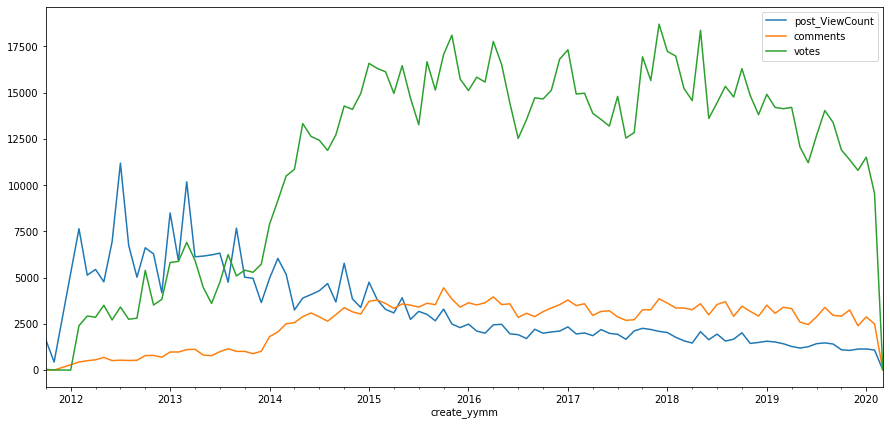

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
posts2.groupby(['create_yymm'])['ViewCount'].mean().plot(ax=ax,label='post_ViewCount')
comments.groupby(['create_yymm']).count()['Id'].plot(ax=ax,label='comments')
votes.groupby(['create_yymm']).count()['Id'].plot(ax=ax,label='votes')
plt.legend()
plt.show()

### Line plot of the effect of the number of tags and time on view counts. 
Before 2014, there was a significant fluctuation on view counts for number of tags.

Specifically, 3 tags and 5 tags attracted the most views in three months before 2014.

However, the effect of number of tags gradually disappeared after 2016. 

The reason may be that people were not attracted by these tags or not using these tags anymore. 

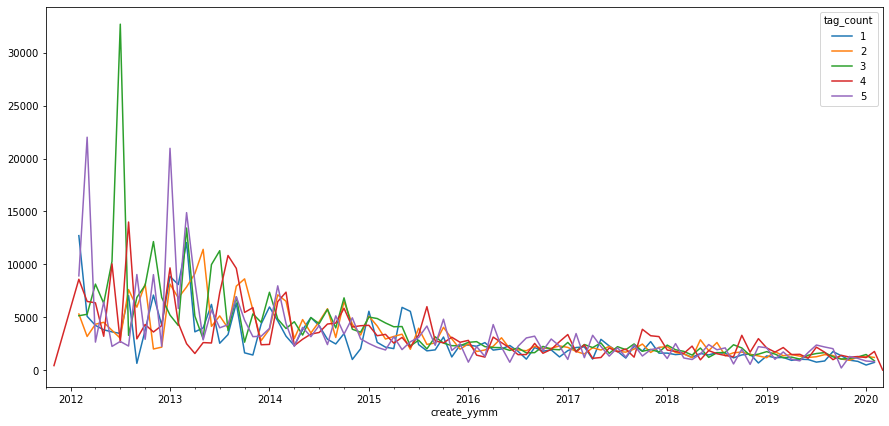

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
posts2.groupby(['create_yymm','tag_count'])['ViewCount'].mean().unstack().plot(ax=ax)
plt.show()

### Line plot of answer counts as a funciton of the number of tags and time 
Compared to the view counts, the answer counts also decrease.

The effect of number of counts also desappeared after early 2016.

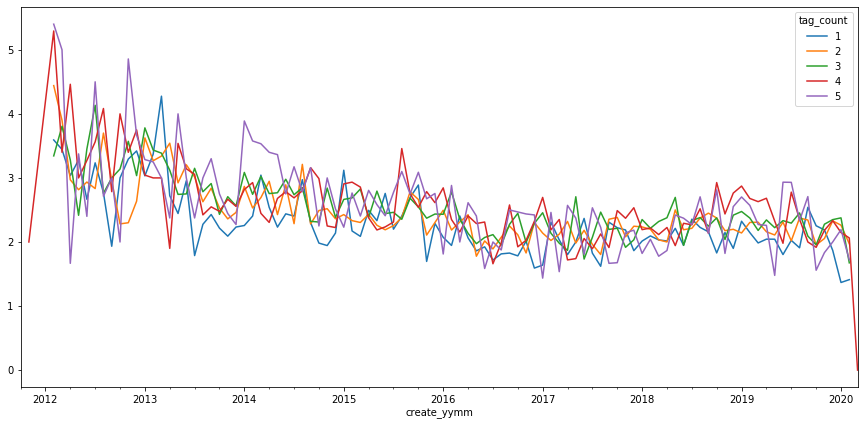

In [22]:

fig, ax = plt.subplots(figsize=(15,7))
posts2.groupby(['create_yymm','tag_count'])['AnswerCount'].mean().unstack().plot(ax=ax)
plt.show()

### Line plot of comment counts as a function of the number of tags and time 
The comment counts had a small increase after 2014 and have kept steady until 2020. 

The comment counts are fluctuating similarly for numbers of tags and time.

The effect of number of tags also disappeared after 2014.


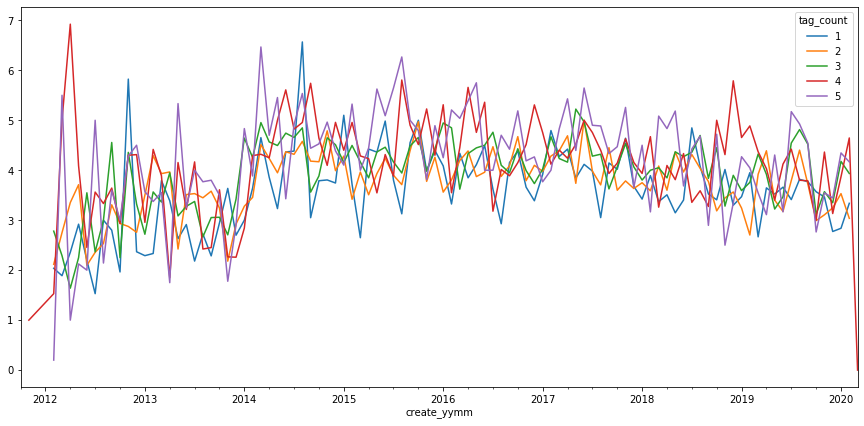

In [23]:

fig, ax = plt.subplots(figsize=(15,7))
posts2.groupby(['create_yymm','tag_count'])['CommentCount'].mean().unstack().plot(ax=ax)
plt.show()